In [ ]:
pip install yfinance

<ipython-input-13-90a23c154378>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')
[*********************100%%**********************]  1 of 1 completed


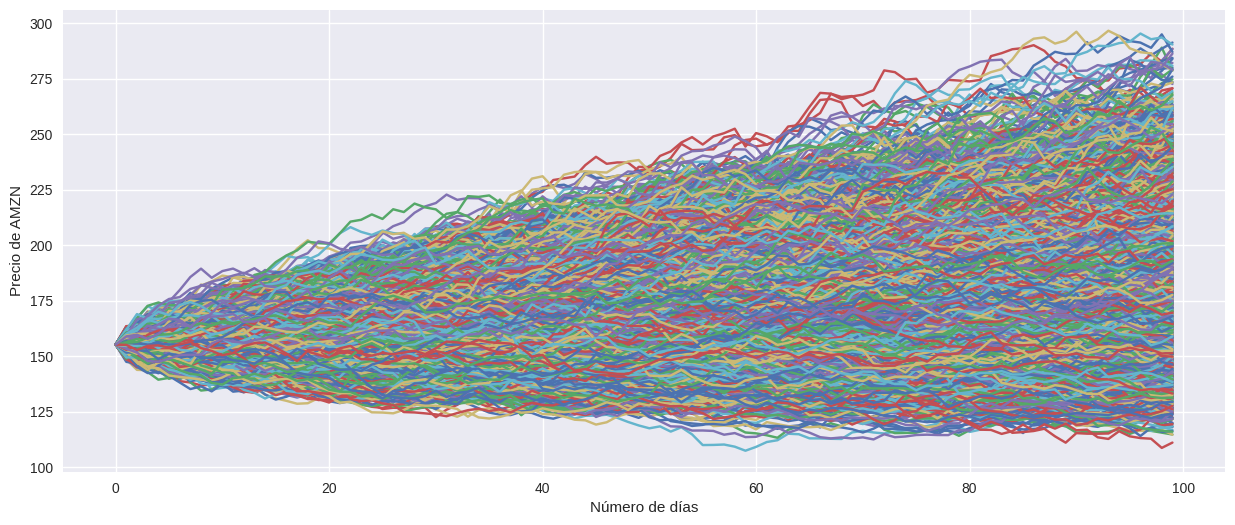

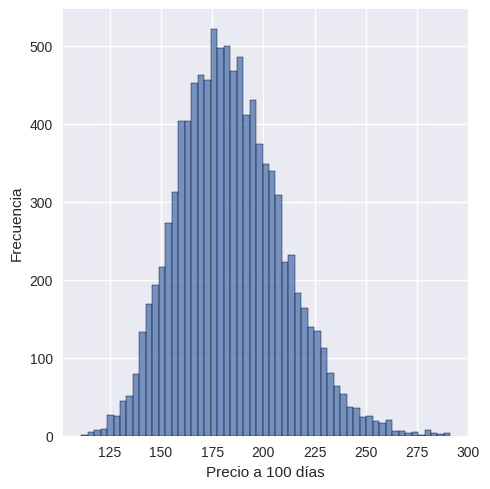

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from matplotlib import style

style.use('seaborn')

ticker = 'AMZN'
data = yf.download(ticker, start='2024-1-1', end='2024-02-01')['Adj Close']

log_returns = np.log(1+data.pct_change())

u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
stdev = log_returns.std()
days = 100
trials = 10000

Z = norm.ppf(np.random.rand(days, trials))
retornos_diarios = np.exp(drift + stdev * Z)
camino_de_precios = np.zeros_like(retornos_diarios)
camino_de_precios[0] = data.iloc[-1]

for t in range(1, days):
    camino_de_precios[t] = camino_de_precios[t-1]*retornos_diarios[t]

plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(camino_de_precios))
plt.xlabel("Número de días")
plt.ylabel("Precio de " + ticker)
sns.displot(pd.DataFrame(camino_de_precios).iloc[-1])
plt.xlabel("Precio a " + str(days) + " días")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
data

Date
2024-01-02    149.929993
2024-01-03    148.470001
2024-01-04    144.570007
2024-01-05    145.240005
2024-01-08    149.100006
2024-01-09    151.369995
2024-01-10    153.729996
2024-01-11    155.179993
2024-01-12    154.619995
2024-01-16    153.160004
2024-01-17    151.710007
2024-01-18    153.500000
2024-01-19    155.339996
2024-01-22    154.779999
2024-01-23    156.020004
2024-01-24    156.869995
2024-01-25    157.750000
2024-01-26    159.119995
2024-01-29    161.259995
2024-01-30    159.000000
2024-01-31    155.199997
Name: Adj Close, dtype: float64

In [ ]:
Z

array([[-0.79250116, -0.68248271,  0.55715158, ..., -2.32638612,
        -1.10407673, -0.07724988],
       [-1.12406751,  0.78826185,  0.10314967, ...,  0.24876799,
        -0.17443438,  1.58115039],
       [ 0.01529929, -0.61513489, -0.10337059, ...,  0.07661052,
        -1.19688363,  0.22231109],
       ...,
       [-0.16287294,  0.87411954,  1.08592709, ..., -0.16952005,
         0.01251574, -0.3918071 ],
       [-0.24215522,  0.5988517 , -0.53030764, ..., -1.07112992,
        -0.95798905, -0.53798641],
       [-0.06899834, -0.606195  , -1.12525276, ...,  0.90703808,
        -0.04994797,  1.18572621]])